In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
plt.figure(figsize= (10, 10), dpi=400)

cat=pd.read_excel('酒精转化率关于温度.xlsx',index_col=0)



<Figure size 4000x4000 with 0 Axes>

In [9]:
cat.index
cat.iloc[0,0]

2.07

 popt返回的是给定模型的最优参数。我们可以使用pcov的值检测拟合的质量，其对角线元素值代表着每个参数的方差。

popt, pcov = curve_fit(func1, x, y)

a = popt[0]

b = popt[1]

c = popt[2]

print(pcov)

yvals = func(x,a,b,c) 

plot1 = plt.plot(x, y, 's',label='original values')

plot2 = plt.plot(x, yvals, 'r',label='polyfit values') 

C:\Users\ZuYong\AppData\Local\Temp\ipykernel_21384\2408411400.py:13: RuntimeWarning: overflow encountered in exp
  exp_value=np.exp(a*(x-t0))
C:\Users\ZuYong\AppData\Local\Temp\ipykernel_21384\2408411400.py:14: RuntimeWarning: invalid value encountered in divide
  return (c*exp_value*b)/(c+(exp_value-1)*b)
c:\Users\ZuYong\anaconda3\envs\pytorch\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ZuYong\AppData\Local\Temp\ipykernel_21384\2408411400.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5),dpi=150)


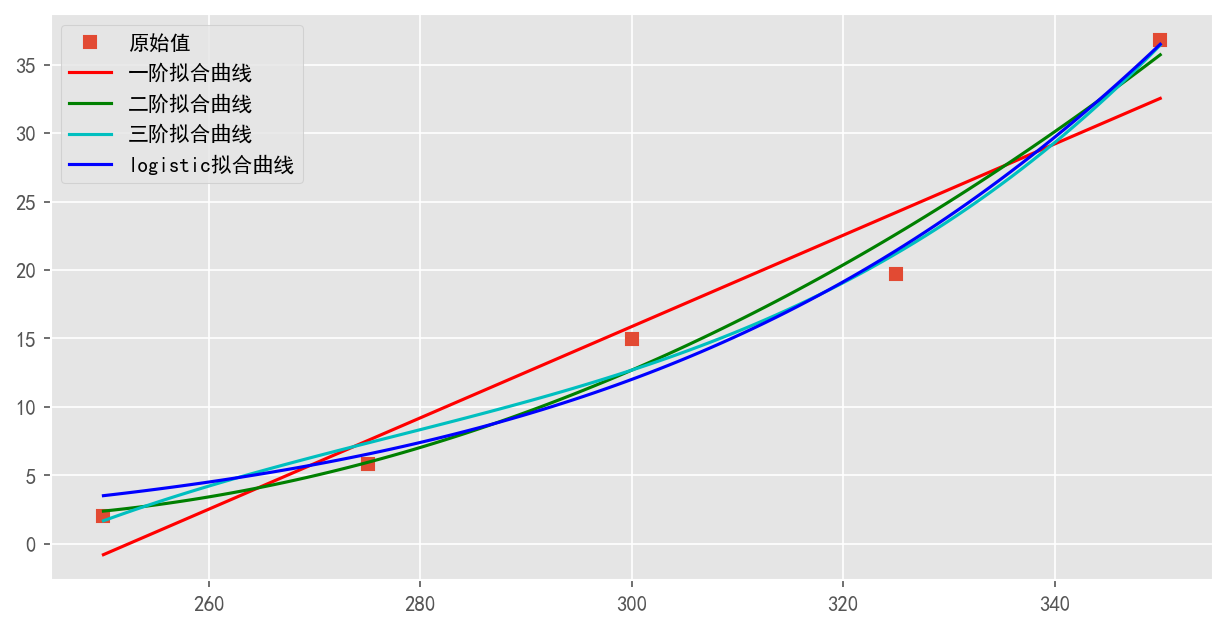

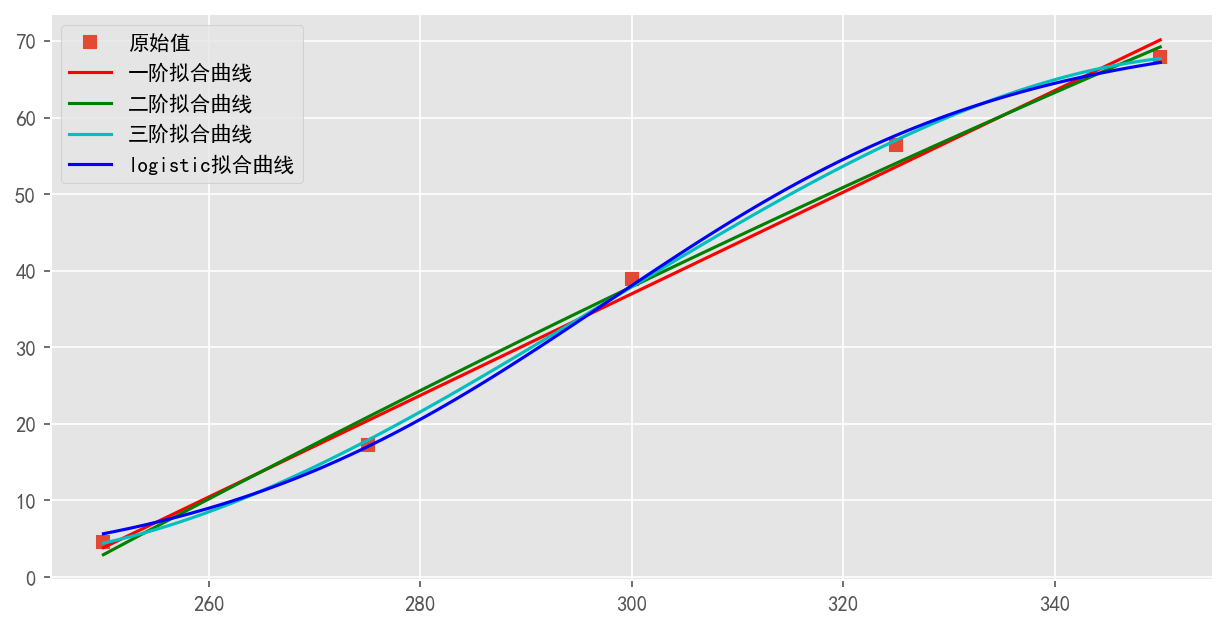

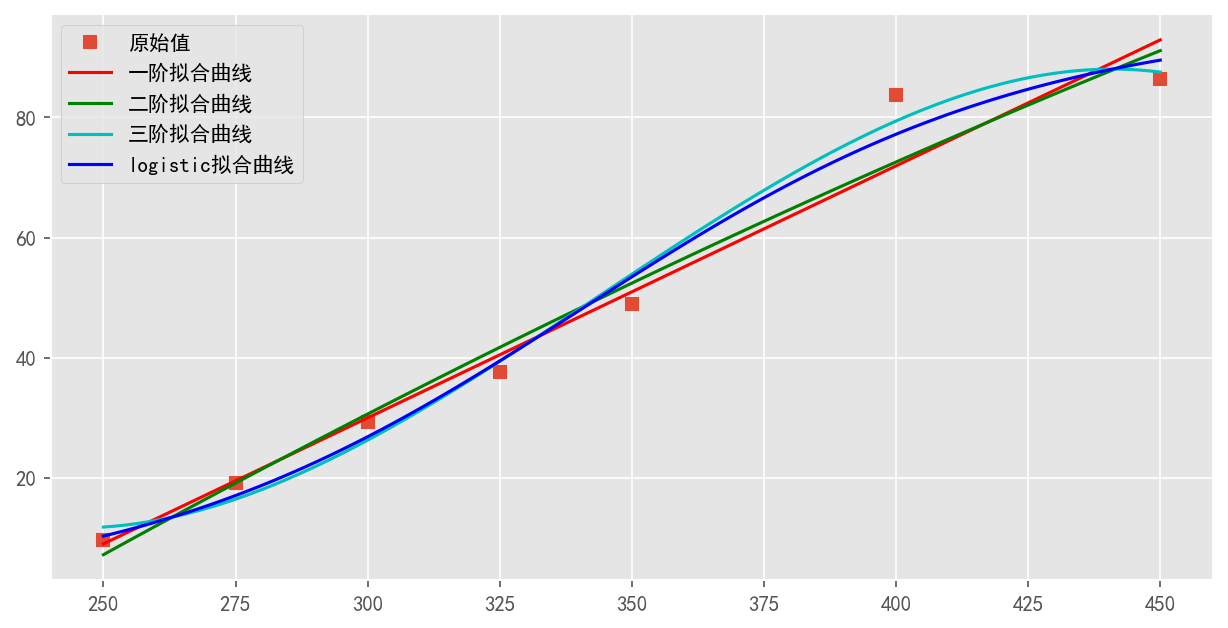

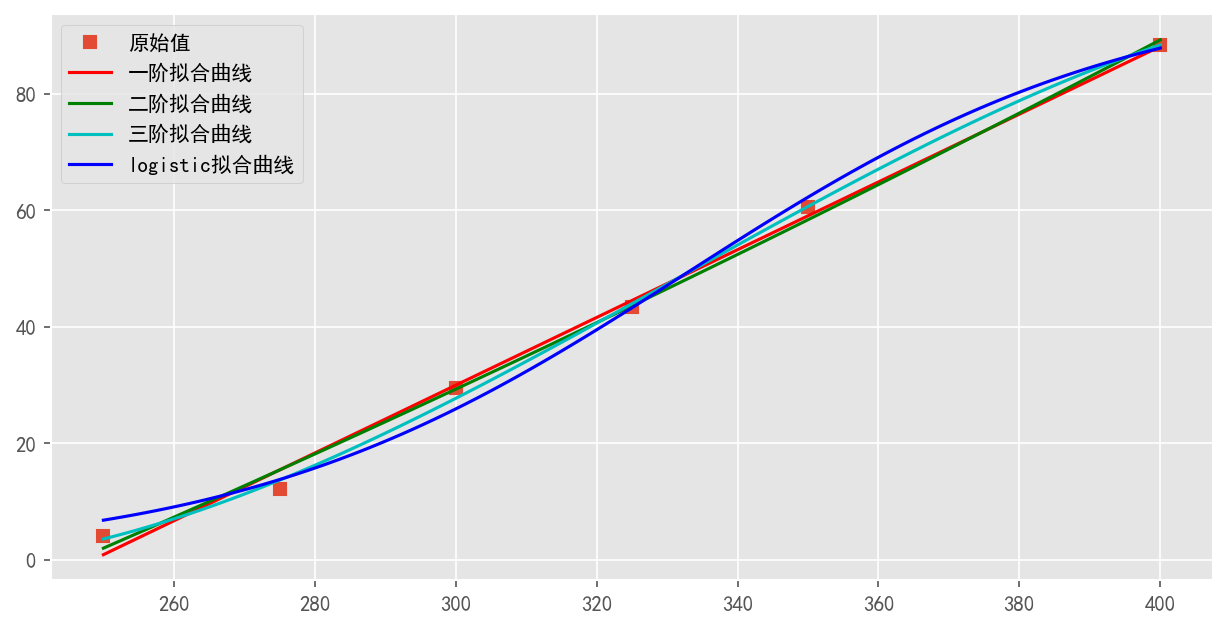

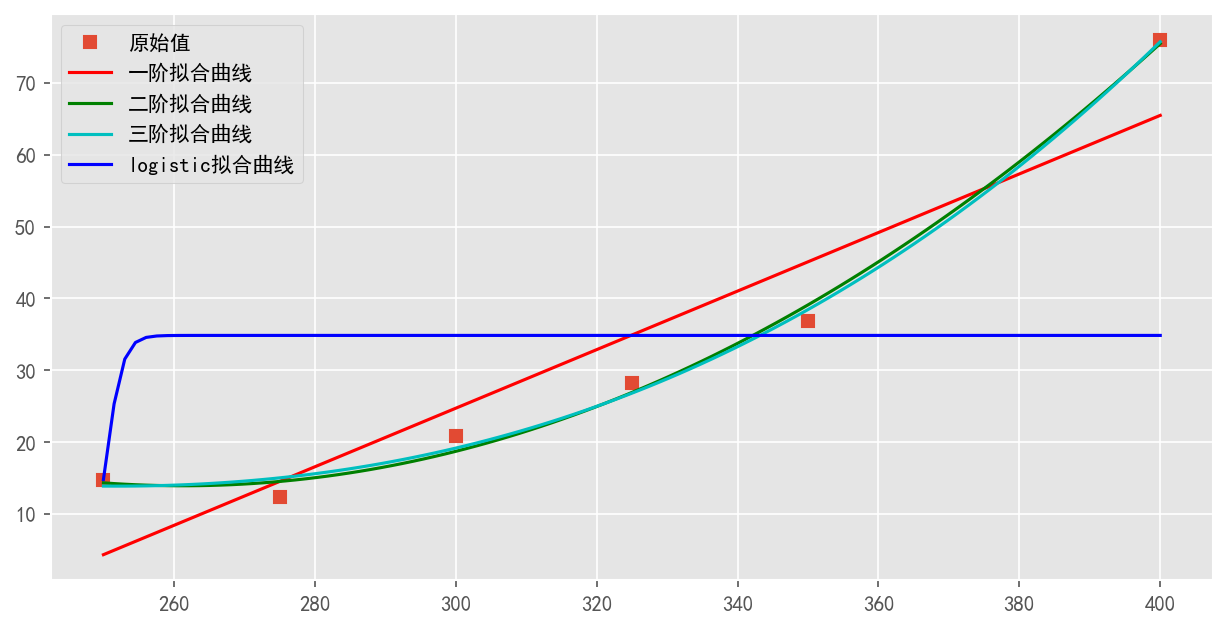

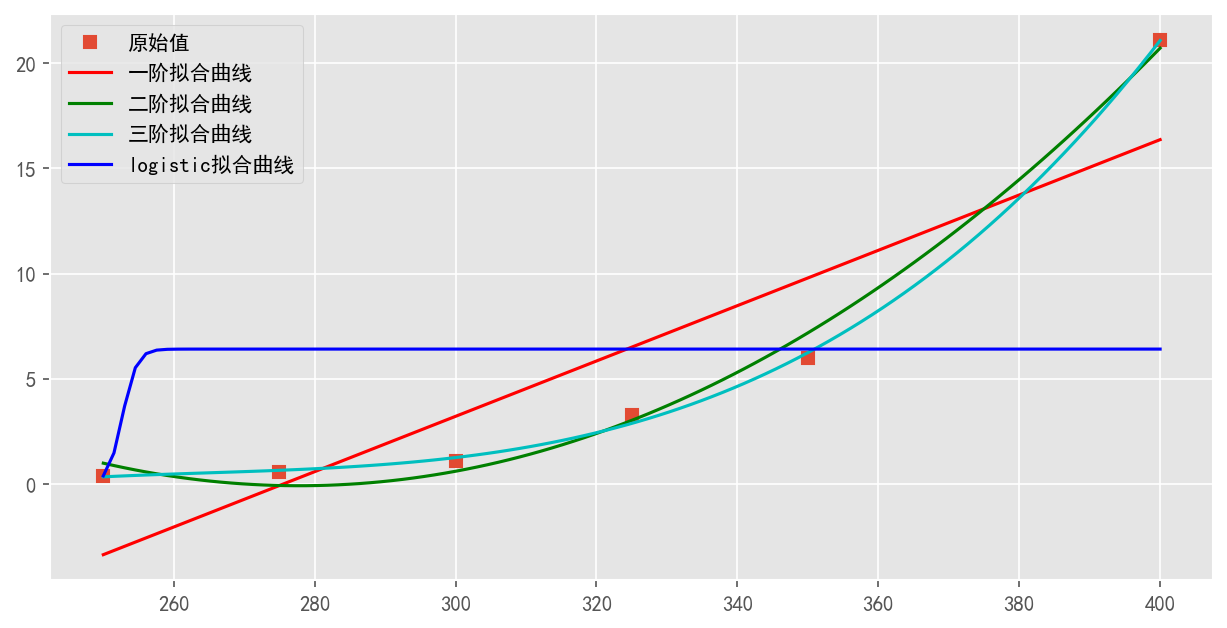

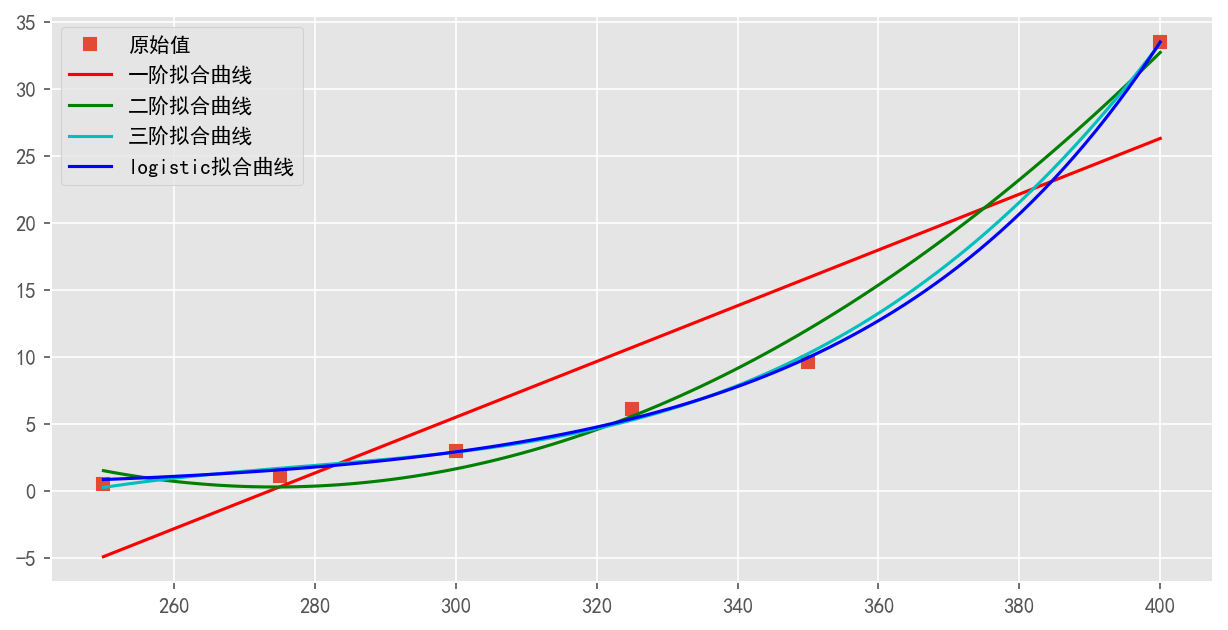

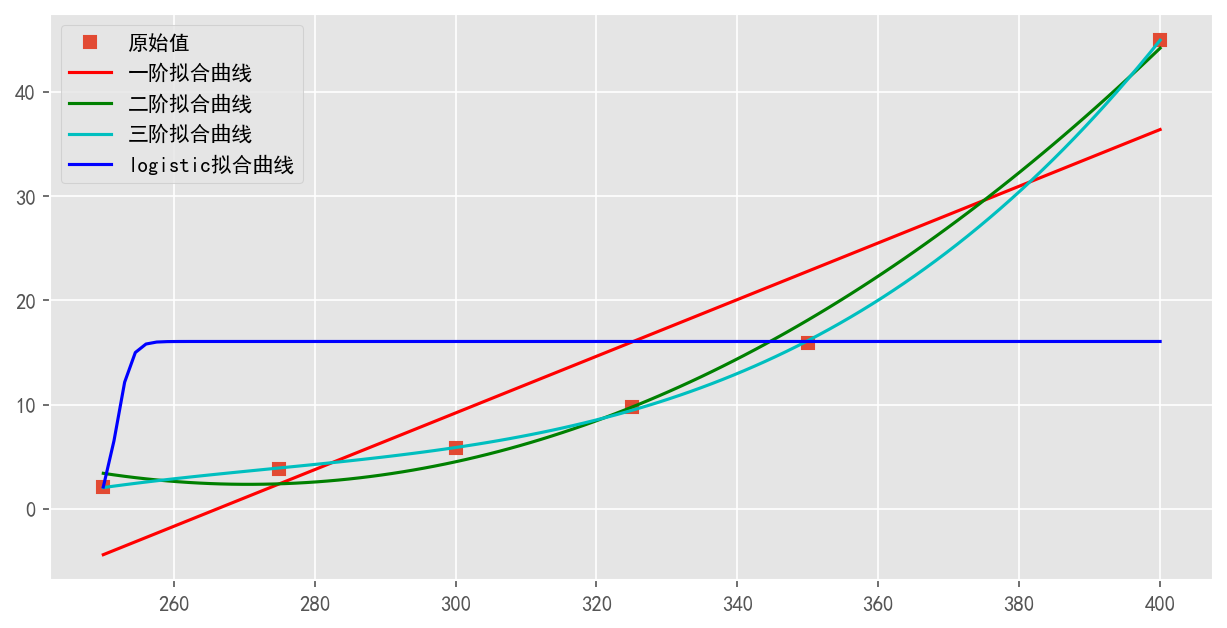

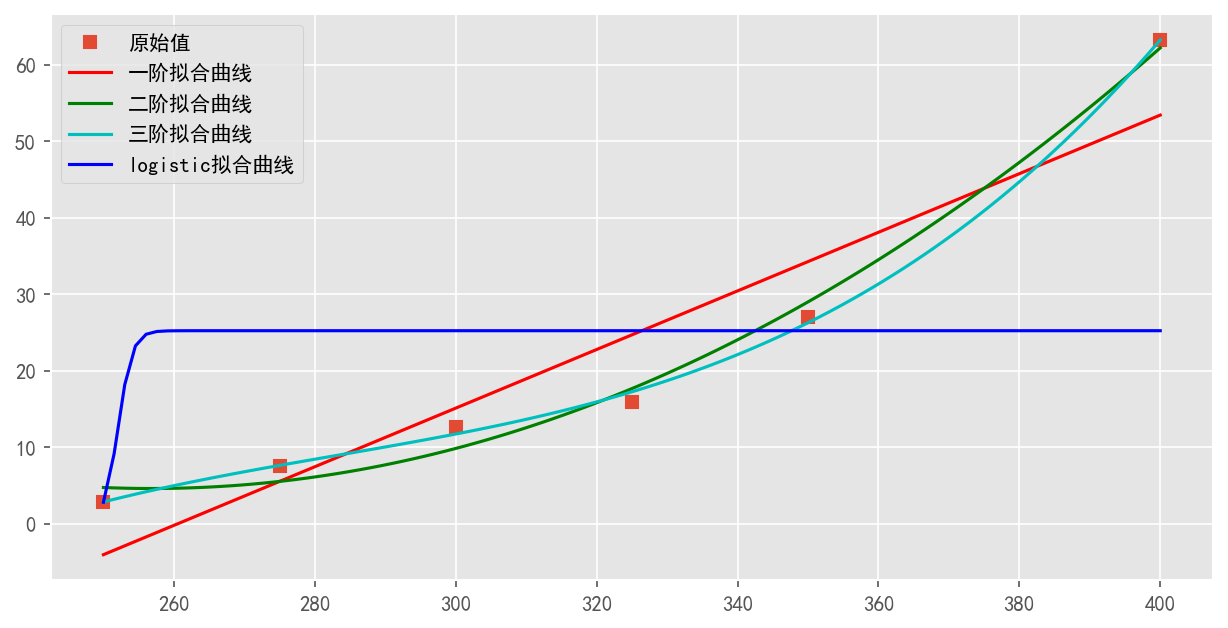

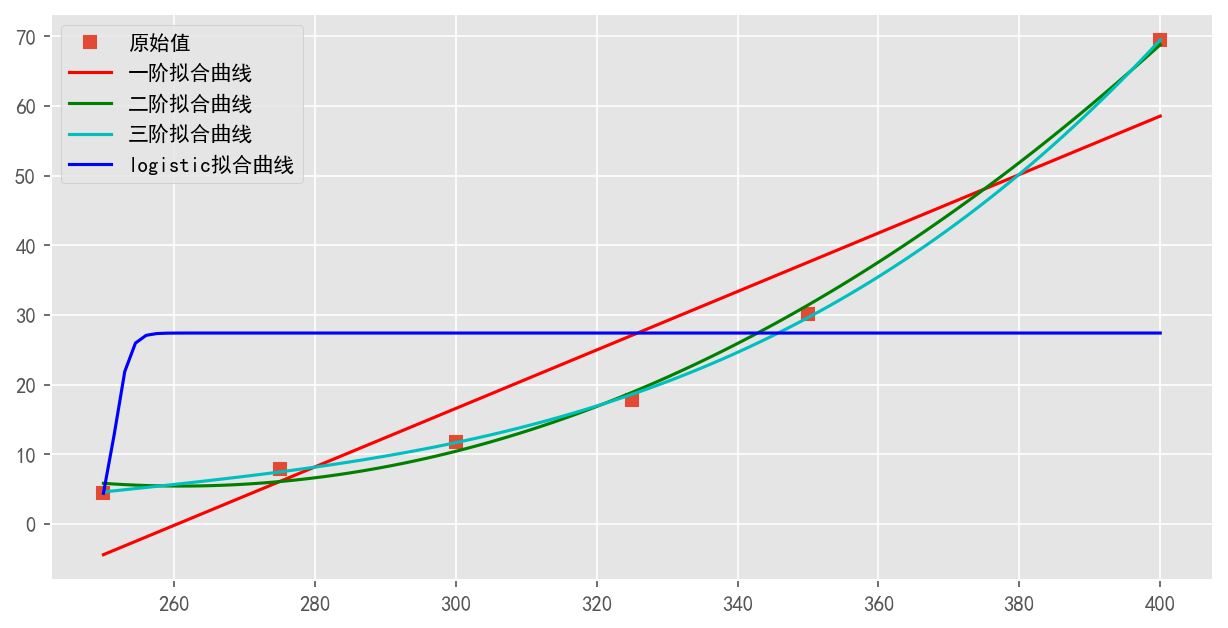

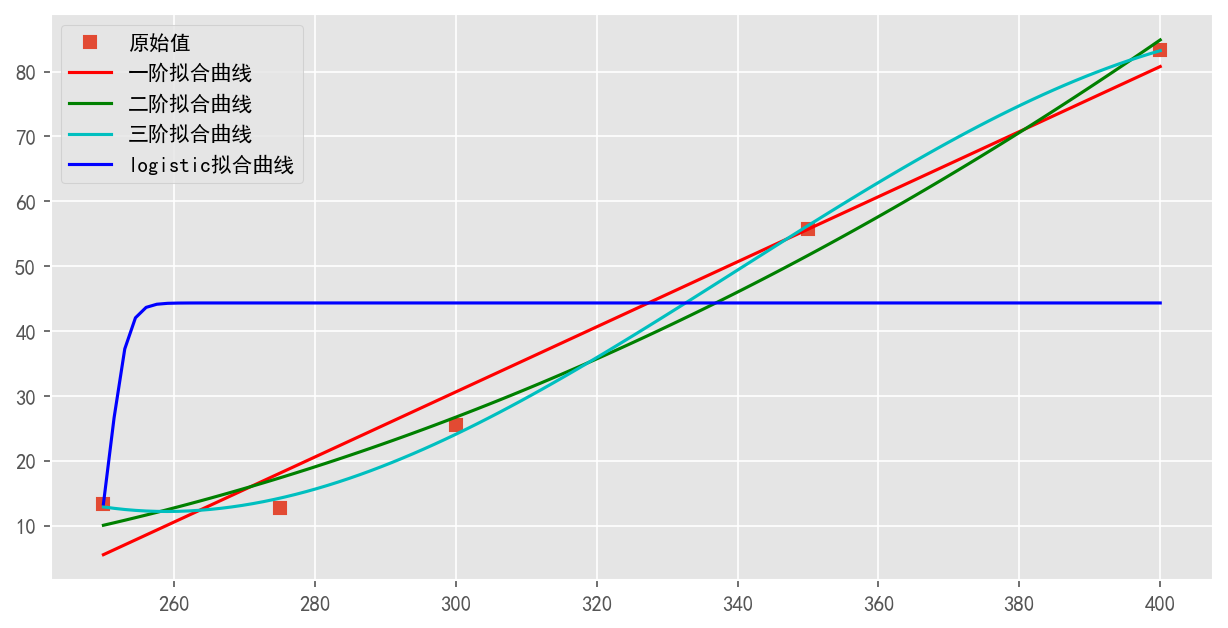

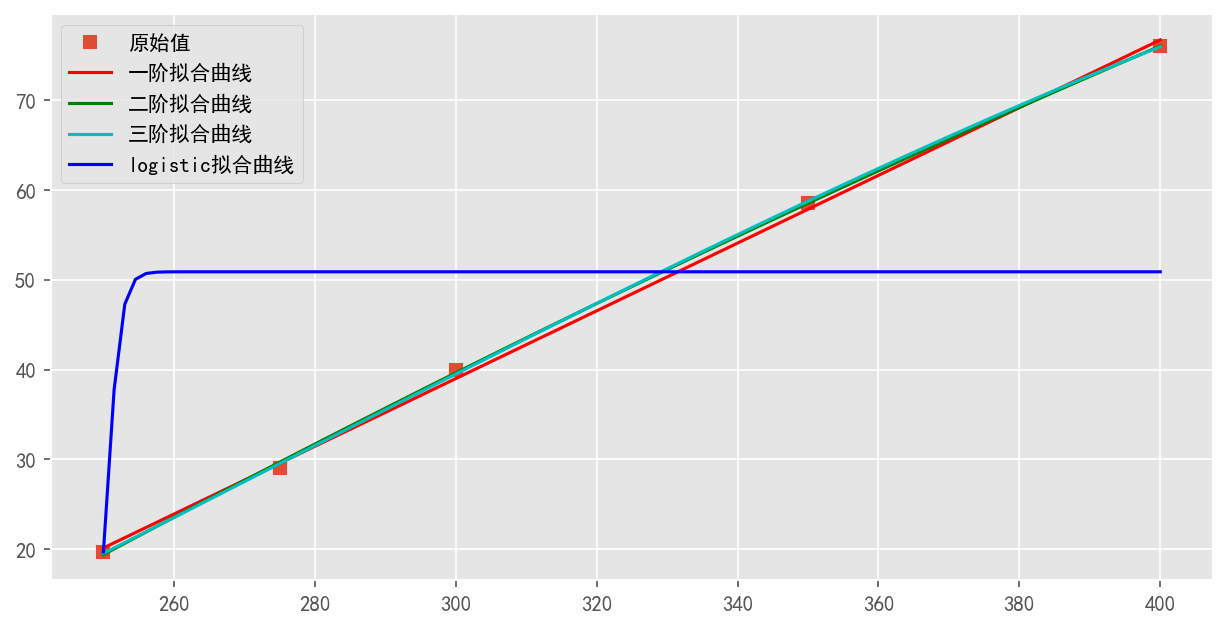

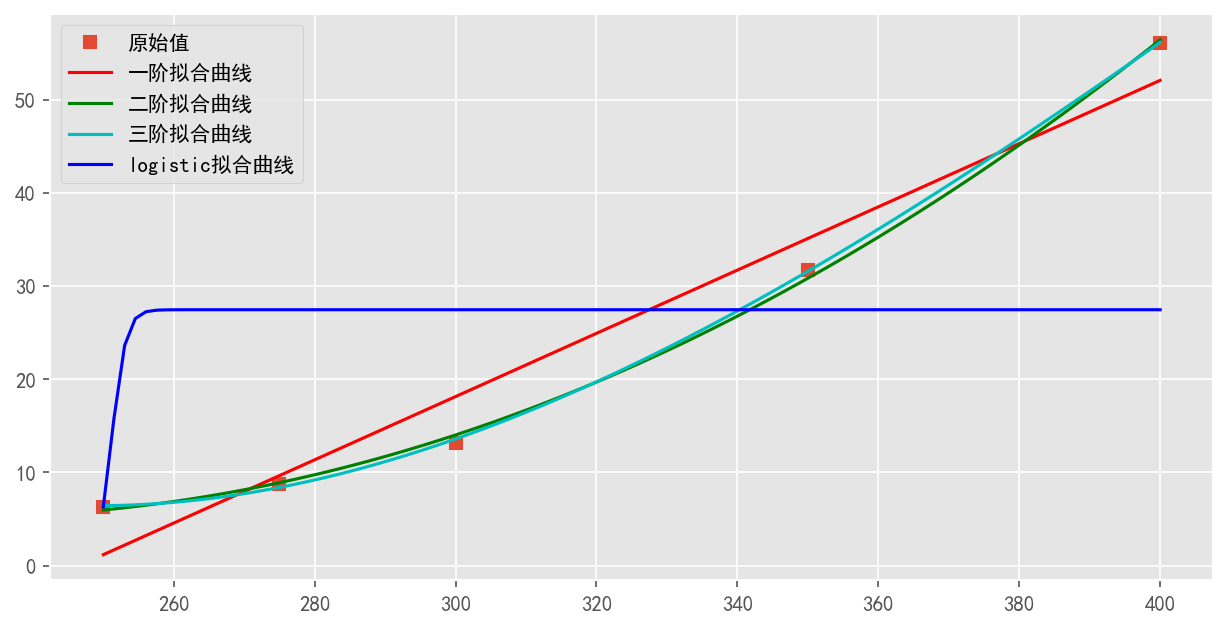

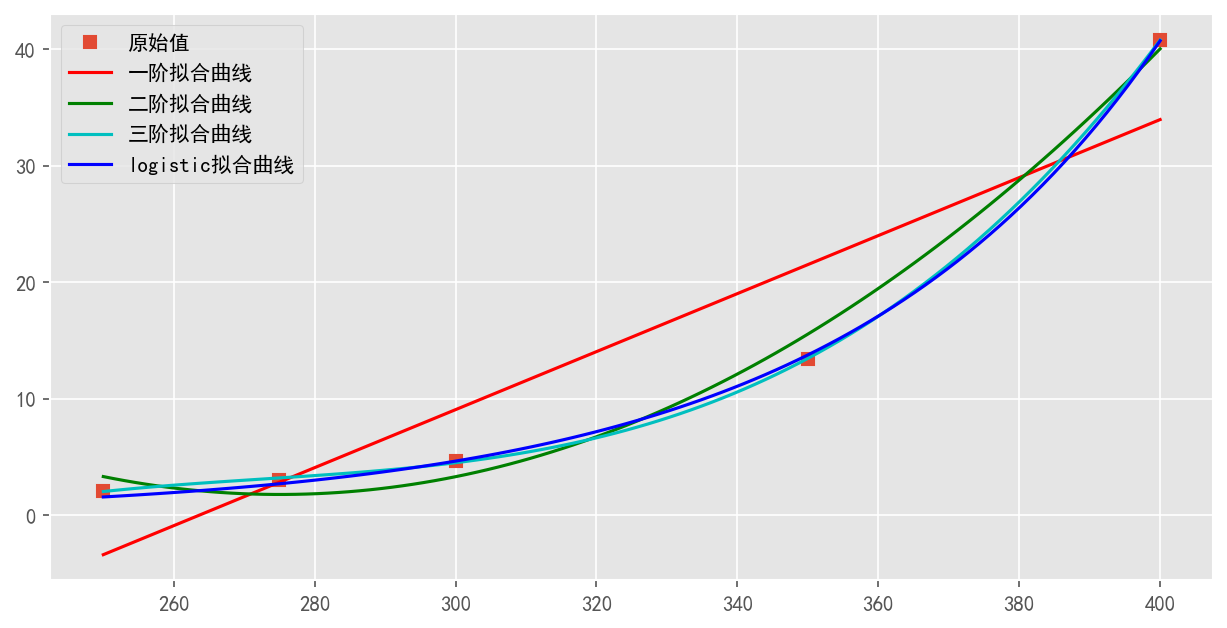

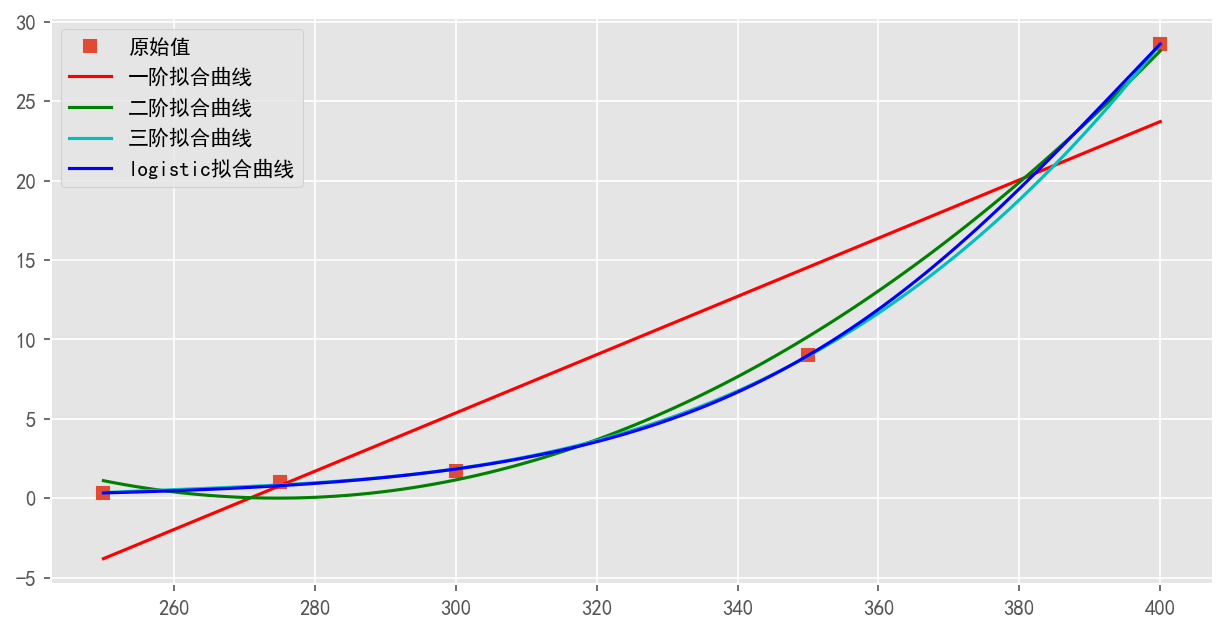

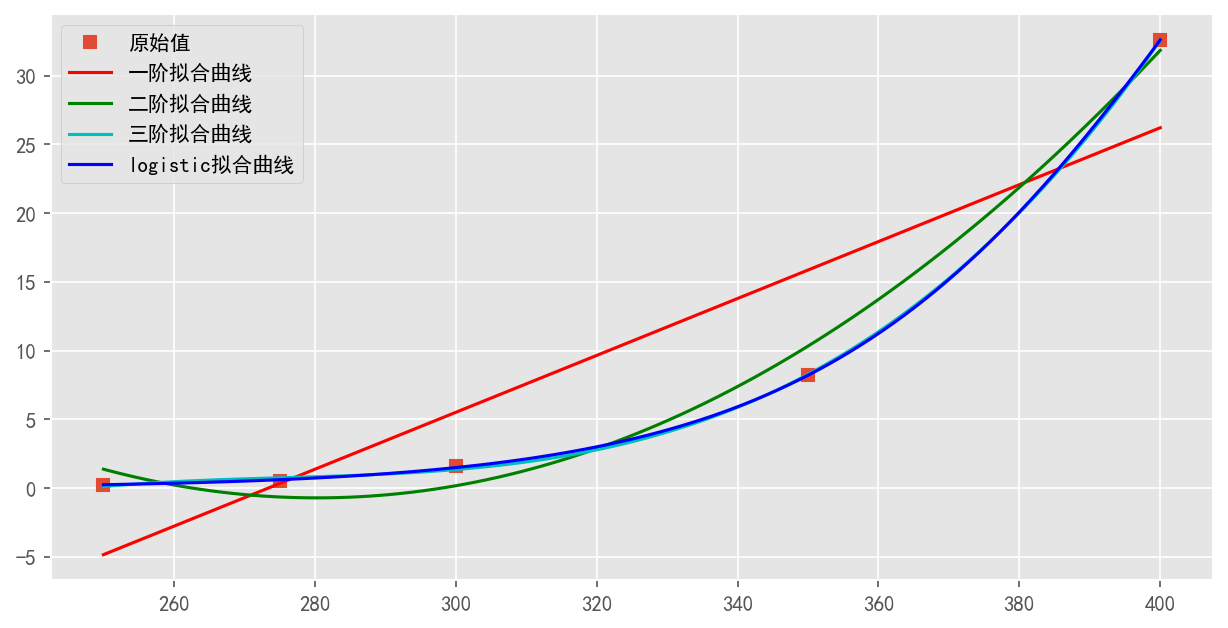

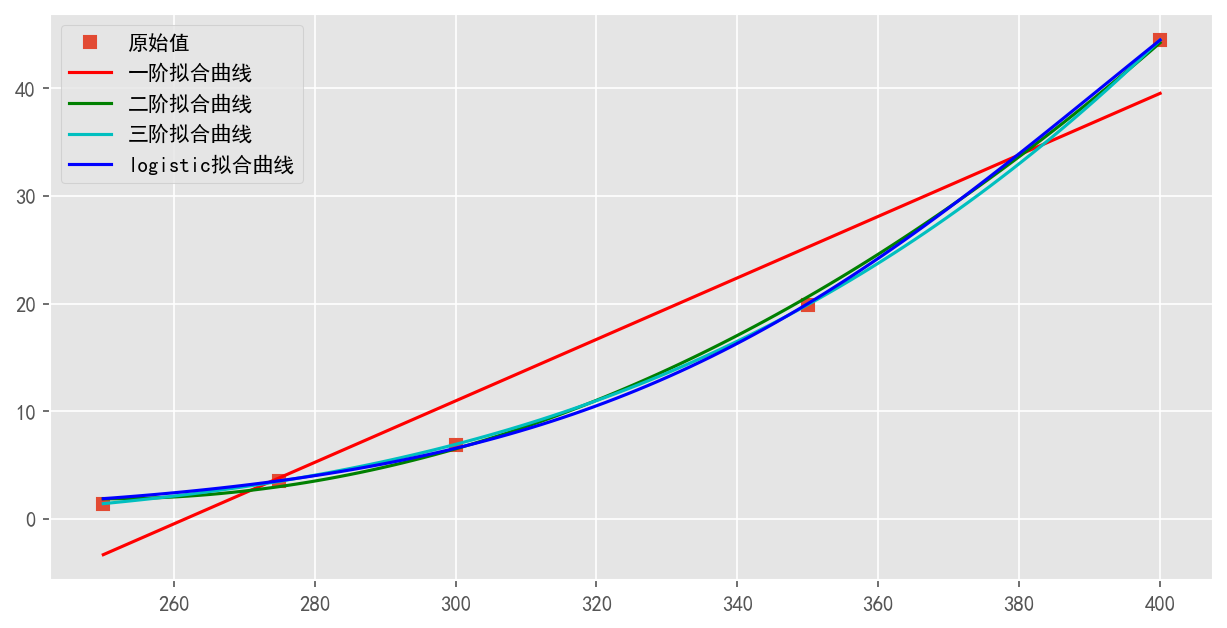

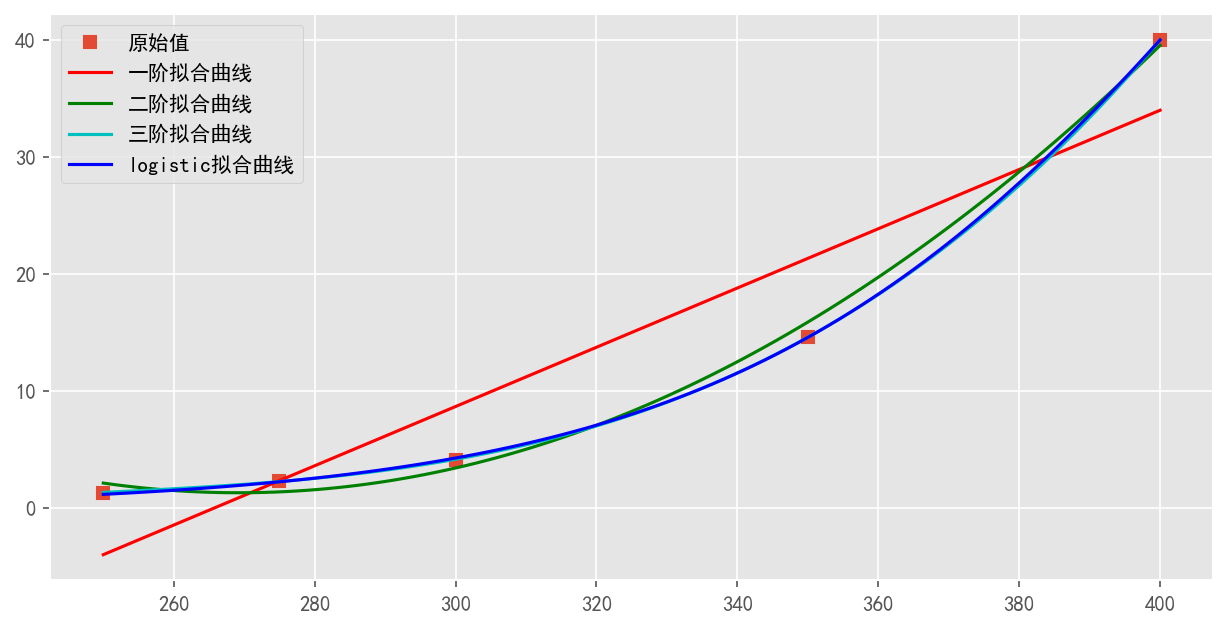

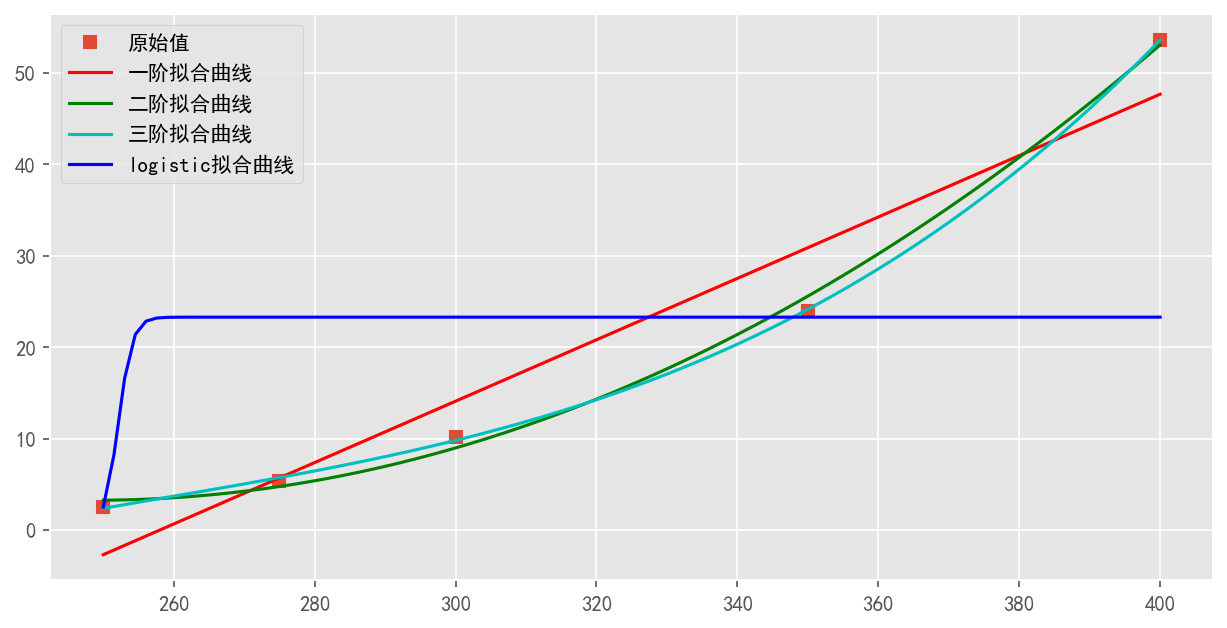

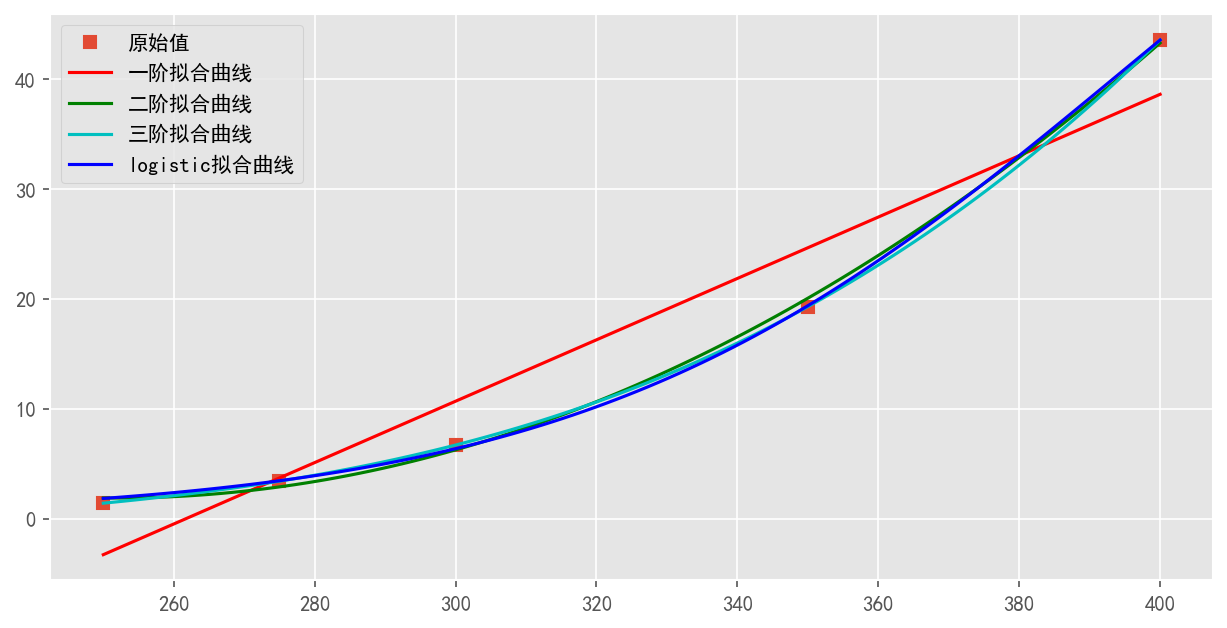

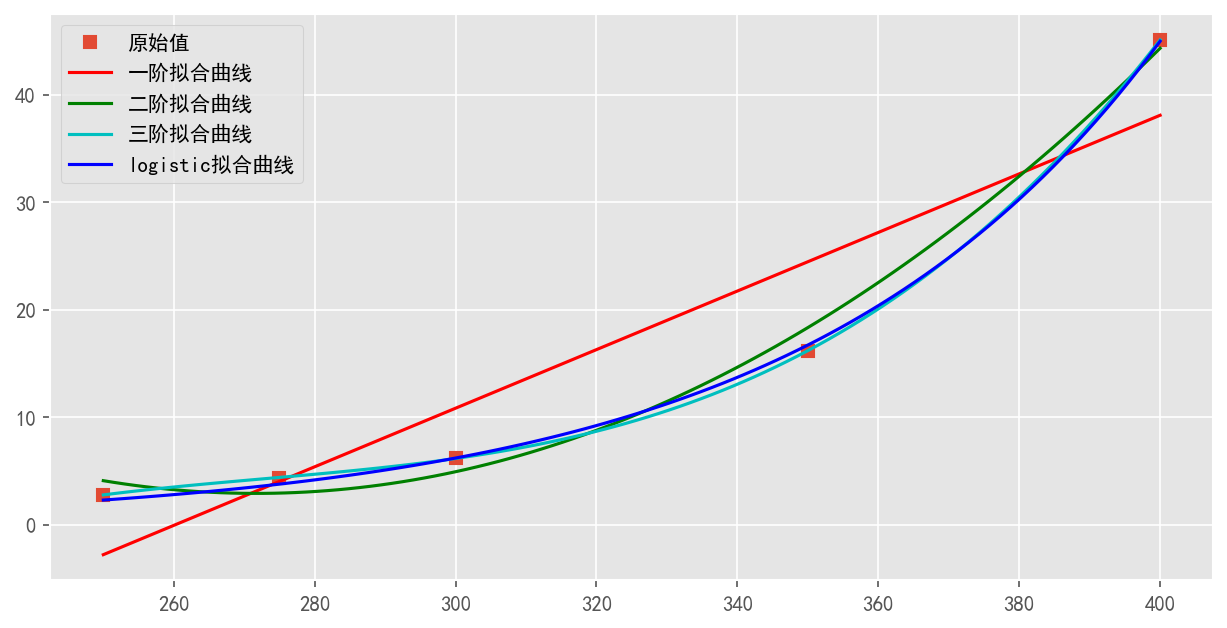

In [45]:
#1
def func1(x,a,b):
    return a+b*x
#2
def func2(x,a,b,c):
    return a+b*x+c*np.square(x)
#3
def func3(x,a,b,c,d):
    return a+b*x+c*np.square(x)+d*np.power(x,3)
#logistic
def func4(x,a,b,c):
    t0=250
    exp_value=np.exp(a*(x-t0))
    return (c*exp_value*b)/(c+(exp_value-1)*b)

def fun_fit_all(x,y_na,i):
    tmp_r2=np.zeros(4)
    plt.figure(figsize=(10,5),dpi=150)
    popt1,pcov1=curve_fit(func1,x,y_na)
    mean = np.mean(y_na) 
    ss_tot = np.sum((y_na - mean) ** 2) 
    ss_res = np.sum((y_na - func1(x, *popt1)) ** 2) 
    r_squared = 1 - (ss_res / ss_tot)  
    x_line=np.linspace(np.min(x),np.max(x),100)
    plt.plot(x, y_na, 's',label='原始值')
    plt.plot(x_line,func1(x_line,*popt1), 'r',label='一阶拟合曲线')
    tmp_r2[0]=r_squared

    popt2,pcov2=curve_fit(func2,x,y_na)
    mean = np.mean(y_na)
    ss_tot = np.sum((y_na - mean) ** 2) 
    ss_res = np.sum((y_na - func2(x, *popt2)) ** 2)  
    r_squared = 1 - (ss_res / ss_tot) 
    x_line=np.linspace(np.min(x),np.max(x),100)
    plt.plot(x_line,func2(x_line,*popt2), 'g',label='二阶拟合曲线')
    tmp_r2[1]=r_squared

    popt3,pcov3=curve_fit(func3,x,y_na)
    mean = np.mean(y_na)  
    ss_tot = np.sum((y_na - mean) ** 2)  
    ss_res = np.sum((y_na - func3(x, *popt3)) ** 2)  
    r_squared = 1 - (ss_res / ss_tot)  
    x_line=np.linspace(np.min(x),np.max(x),100)
    plt.plot(x_line,func3(x_line,*popt3), 'c',label='三阶拟合曲线')
    tmp_r2[2]=r_squared

    popt4,pcov4=curve_fit(func4,x,y_na)
    mean = np.mean(y_na) 
    ss_tot = np.sum((y_na - mean) ** 2) 
    ss_res = np.sum((y_na - func4(x, *popt4)) ** 2)  
    r_squared = 1 - (ss_res / ss_tot)  
    x_line=np.linspace(np.min(x),np.max(x),100)
    plt.plot(x_line,func4(x_line,*popt4), 'b',label='logistic拟合曲线')
    tmp_r2[3]=r_squared
    plt.legend()
    if i>13:
        str_cate='B'
    else:
        str_cate='A'
    i%=14
    plt.savefig(f"{str_cate}{i+1}.png",dpi=200)
    return tmp_r2

r2_list=np.zeros((21,4))
for i in [0,1]:
    x=np.array([250,275,300,325,350])
    y_na=cat.iloc[:,i].values[0:len(x)]
    r2_list[i,:]=fun_fit_all(x,y_na,i)

for i in [2]:
    x=np.array([250,275,300,325,350,400,450])
    y_na=cat.iloc[:,i].values[0:len(x)]
    r2_list[i,:]=fun_fit_all(x,y_na,i)

for i in [3,4,16,17,18,19,20]:
    x=np.array([250,275,300,325,350,400])
    y_na=cat.iloc[:,i].values[0:len(x)]
    r2_list[i,:]=fun_fit_all(x,y_na,i)

for i in [5,6,7,8,9,10,11,12,13,14,15]:
    x=np.array([250,275,300,350,400])
    y_na=cat.iloc[:,i].values[0:len(x)]
    r2_list[i,:]=fun_fit_all(x,y_na,i)

In [47]:
index=[]
for i in range(21):
    if i>13:
        str_cate='B'
    else:
        str_cate='A'
    index.append(f'{str_cate}{i+1}')

df=pd.DataFrame(r2_list,index=index,columns=['一次','二次','三次','logistic'])

In [48]:
df.to_csv("R2_list.csv",encoding='utf_8_sig')

## lasso


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_l=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021B\附件一(催化剂组合已提取.xlsx",0,index_col=0)

In [3]:
data_l.head()

,装料方式,Co/SiO2含量,Co负载量,HAP含量,乙醇浓度,温度,乙醇转化率(%),乙烯选择性（%）,C4烯烃选择性(%),乙醛选择性(%),碳数为4-12脂肪醇 选择性(%),甲基苯甲醛和甲基苯甲醇选择性(%),其他生成物的选择性(%)
催化剂组合编号,,,,,,,,,,,,,
1,0,200,0.01,200,1.68,250,2.067169,1.17,34.05,2.41,52.59,0.00,9.78
1,0,200,0.01,200,1.68,275,5.851721,1.63,37.43,1.42,53.21,0.00,6.31
1,0,200,0.01,200,1.68,300,14.968891,3.02,46.94,4.71,35.16,1.00,9.17
1,0,200,0.01,200,1.68,325,19.681359,7.97,49.70,14.69,15.16,2.13,10.35
1,0,200,0.01,200,1.68,350,36.801017,12.46,47.21,18.66,9.22,1.69,10.76


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
x, y = data_l.iloc[:, 0:6].values.astype(np.float64), data_l.iloc[:, 6].values.astype('int')

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
MAE=[]
# r2=np.zeros((400,20))
max_r=0
index=0
i=21
list_r2_n_e=[]
for i in range(5,150):
    rfc=RandomForestClassifier(n_estimators=i,random_state=0)
    rfc.fit(x_train,y_train)
    prediction=rfc.predict(x_test)
    score=metrics.r2_score(prediction,y_test)
    list_r2_n_e.append(score)

In [89]:
list_r2=[]
for j in range(3,20):
    rfc=RandomForestClassifier(max_depth=j,random_state=0)
    rfc.fit(x_train,y_train)
    prediction=rfc.predict(x_test)
    score=metrics.r2_score(prediction,y_test)
    list_r2.append(score)

In [45]:
index_r2=np.argmax(r2)
print(r2[index_r2])
importances = rfc.feature_importances_

0.7858598466515525
